In [1]:
import numpy as np
import rasterio

In [ ]:
df = rasterio.open(r"..\data\geotiff\nepal_lc_2020.tif")
data = df.read()
print(f"Numpy aray of data:\n {data}")

Numpy aray of data:
 [[[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]]


In [3]:
metadata = df.meta
height = df.height
width = df.width
crs = df.crs
driver = df.driver
bands = df.count
transform = df.transform
description = df.descriptions

print(f" Height: {height}\n Width: {width}\n CRS: {crs}\n Driver: {driver}\n No. of bands: {bands}\n Transformation: {transform}\n Metadata: {metadata}\n Description: {description}")


 Height: 1485
 Width: 2932
 CRS: EPSG:4326
 Driver: GTiff
 No. of bands: 1
 Transformation: | 0.00, 0.00, 80.06|
| 0.00,-0.00, 30.47|
| 0.00, 0.00, 1.00|
 Metadata: {'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 255.0, 'width': 2932, 'height': 1485, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(0.0027777777777780012, 0.0, 80.05847091000004,
       0.0, -0.0027777777777780012, 30.472819010000357)}
 Description: (None,)


In [4]:
size = data.size
shape = data.shape

print(f" Numpy array size: {size}\n Numpy array shape: {shape}")

 Numpy array size: 4354020
 Numpy array shape: (1, 1485, 2932)


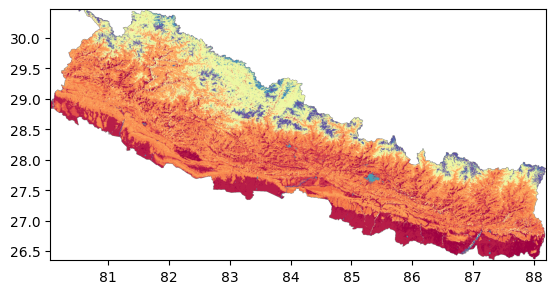

<Axes: >

In [5]:
from rasterio.plot import show
import matplotlib

show(df, transform = transform, cmap = 'Spectral')

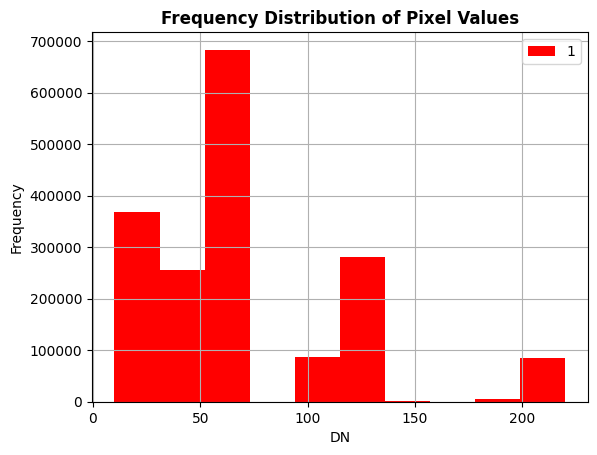

In [6]:
from rasterio.plot import show_hist
show_hist(df, title = "Frequency Distribution of Pixel Values")

In [ ]:
# Masking the raster to focus on Pokhara region
import fiona 
import rasterio.mask

with fiona.open(r"..\data\shp\pokhara.shp",
                 "r") as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]

with rasterio.open(r"..\data\geotiff\nepal_lc_2020.tif") as src:
    out_image, out_transform = rasterio.mask.mask(src, shapes, crop = True)
    out_meta = src.meta

out_meta.update({"driver": "GTiff",
                "height": out_image.shape[1],
                "width": out_image.shape[2],
                "transform": out_transform})

# Write
with rasterio.open(r"..\data\geotiff\pokhara-mask.tif", "w", **out_meta) as dest:
    dest.write(out_image)

In [ ]:
df_pokhra = rasterio.open(r"..\data\geotiff\pokhara-mask.tif")

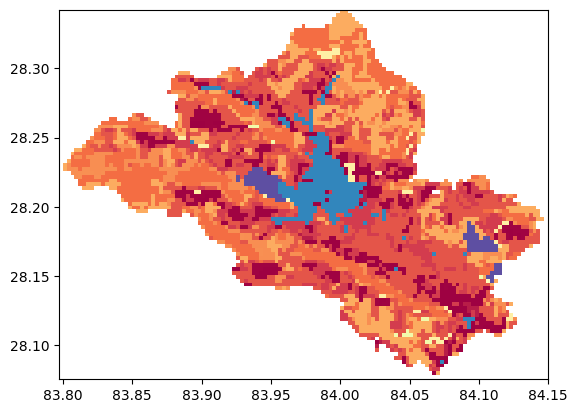

<Axes: >

In [11]:
show(df_pokhra, transform=df_pokhra.transform, cmap = "Spectral")

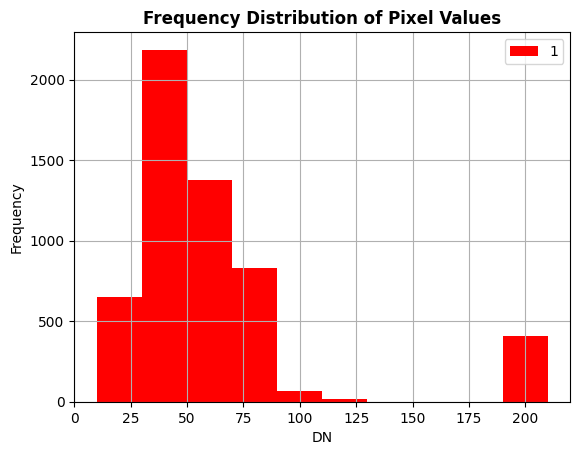

In [12]:
show_hist(df_pokhra, title = "Frequency Distribution of Pixel Values")